Digite o número de termos N: 50


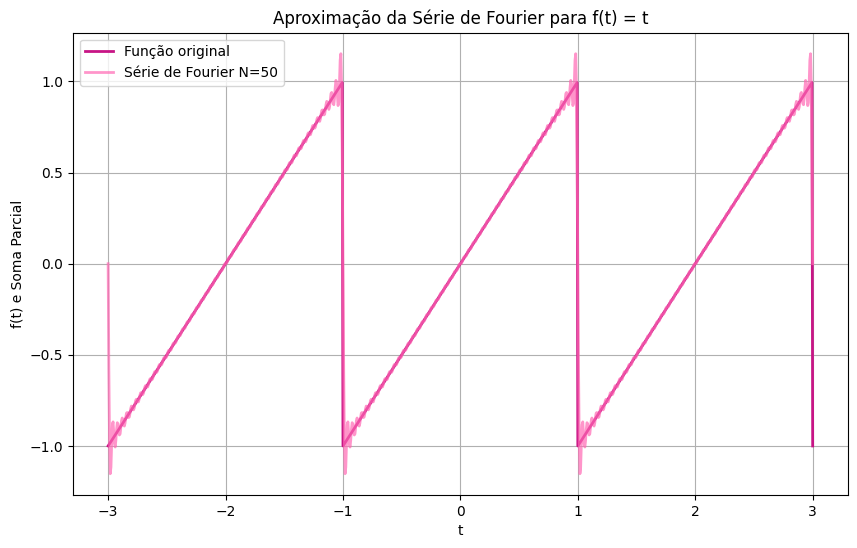

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad

# Parâmetros da função periódica
t0 = 2  # Período
w0 = 2 * np.pi / t0  # Frequência fundamental

# Função original f(t) = t definida no intervalo -1 <= t <= 1
def f(t):
    t = (t + 1) % t0 - 1  # Ajuste para tornar a função periódica
    return t

# Cálculo numérico dos coeficientes a_n
def a_n(n):
    return 0  # A função é ímpar, então todos os coeficientes a_n são zero

# Cálculo numérico dos coeficientes b_n
def b_n(n):
    if n == 0:
        return 0
    else:
        integral, _ = fixed_quad(lambda t: f(t) * np.sin(n * w0 * t), -1, 1, n=100)
        return (2 / t0) * integral

# Soma da Série de Fourier
def fourier_series(t, N):
    sum_series = np.zeros_like(t)
    for n in range(1, N + 1):
        sum_series += b_n(n) * np.sin(n * w0 * t)
    return sum_series

# Entrada do usuário
N = int(input("Digite o número de termos N: "))

# Intervalo de tempo para o gráfico
t = np.linspace(-3, 3, 1000)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, f(t), color='#C71585', label='Função original', linewidth=2)
plt.plot(t, fourier_series(t, N), color='#FF69B4', label=f'Série de Fourier N={N}', linewidth=2, alpha=0.7)
plt.title('Aproximação da Série de Fourier para f(t) = t')
plt.xlabel('t')
plt.ylabel('f(t) e Soma Parcial')
plt.legend()
plt.grid()
plt.show()




Digite o número de termos N: 60


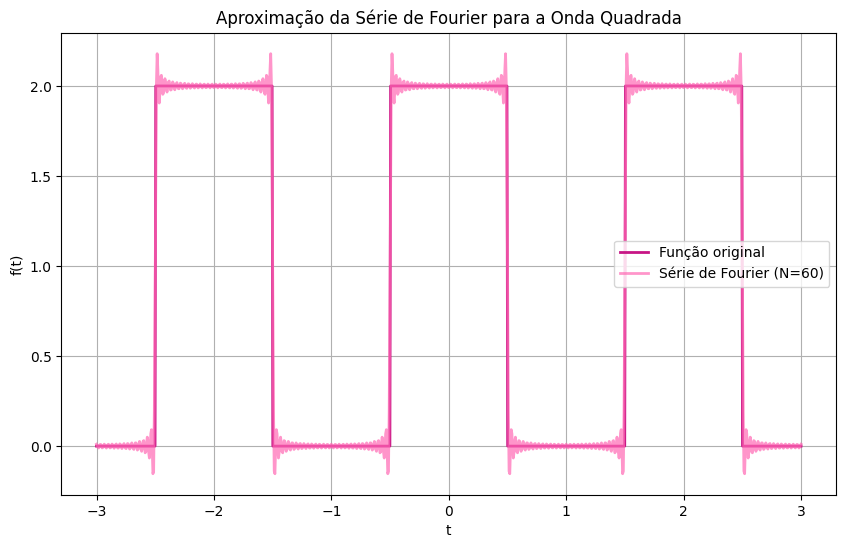

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parâmetros da função periódica
t0 = 2  # Período
w0 = 2 * np.pi / t0  # Frequência fundamental, ou seja, w0 = π

# Função original: Onda quadrada
# f(t) = 2 para -0.5 <= t < 0.5, e f(t)=0 caso contrário.
def f(t):
    # Mapeia t para o intervalo [-t0/2, t0/2)
    t = (t + t0/2) % t0 - t0/2
    return np.where((-0.5 <= t) & (t < 0.5), 2, 0)

# Cálculo dos coeficientes de Fourier via integração
def a_n(n):
    # a_n = (2/T0) * ∫_{-T0/2}^{T0/2} f(t) cos(n ω0 t) dt,
    # mas f(t) é diferente de zero apenas para t em [-0.5, 0.5)
    if n == 0:
        # a_0 = (2/T0) * ∫_{-0.5}^{0.5} 2 dt
        integral, _ = quad(lambda t: 2, -0.5, 0.5)
        return (2/t0)*integral
    else:
        integral, _ = quad(lambda t: 2 * np.cos(n*np.pi*t), -0.5, 0.5)
        return (2/t0)*integral

def b_n(n):
    # Para função par, b_n = 0
    return 0

# Soma da Série de Fourier
def fourier_series(t, N):
    # f_Fourier(t) = a0/2 + Σₙ₌₁ᴺ a_n cos(n ω0 t)
    result = np.full_like(t, a_n(0)/2)
    for n in range(1, N+1):
        result += a_n(n)*np.cos(n*w0*t)  # b_n(n)=0
    return result

# Solicita ao usuário o número de termos N
N = int(input("Digite o número de termos N: "))

# Valores de tempo para o gráfico
t = np.linspace(-3, 3, 1000)

# Plot
plt.figure(figsize=(10,6))
plt.plot(t, f(t), color='#C71585', label='Função original', linewidth=2)
plt.plot(t, fourier_series(t, N), color='#FF69B4', label=f'Série de Fourier (N={N})', linewidth=2, alpha=0.7)
plt.title('Aproximação da Série de Fourier para a Onda Quadrada')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid()
plt.show()


Digite o valor de N (número de harmônicos): 60


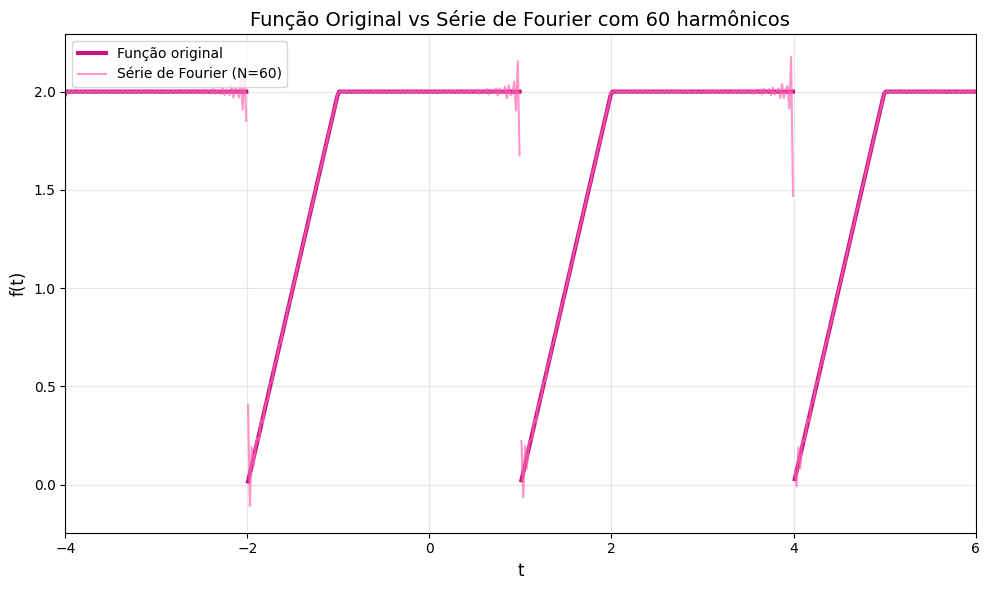

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parâmetros da função periódica
T = 3.0
omega = 2 * np.pi / T

# Função base definida no intervalo [-2, 1) e estendida periodicamente
def f_base(t):
    t_mod = ((t + 2) % T) - 2  # Mapeia para o intervalo base [-2, 1)
    if -2 <= t_mod < -1:
        return 2 * t_mod + 4
    elif -1 <= t_mod < 1:
        return 2
    else:
        return 0  # Descontinuidade em t_mod = 1

# Cálculo dos coeficientes
I1, _ = quad(lambda t: (2*t + 4), -2, -1)
I2, _ = quad(lambda t: 2, -1, 1)
a0 = (2 / T) * (I1 + I2)

def a_n(n):
    I1, _ = quad(lambda t: (2*t + 4) * np.cos(omega * n * t), -2, -1)
    I2, _ = quad(lambda t: 2 * np.cos(omega * n * t), -1, 1)
    return (2 / T) * (I1 + I2)

def b_n(n):
    I1, _ = quad(lambda t: (2*t + 4) * np.sin(omega * n * t), -2, -1)
    I2, _ = quad(lambda t: 2 * np.sin(omega * n * t), -1, 1)
    return (2 / T) * (I1 + I2)

# Reconstrói a série de Fourier
def fourier_series(t, N, a0, a_coeffs, b_coeffs):
    result = a0 / 2.0
    for n in range(1, N + 1):
        result += a_coeffs[n - 1] * np.cos(omega * n * t) + b_coeffs[n - 1] * np.sin(omega * n * t)
    return result

# Entrada do usuário
N = int(input("Digite o valor de N (número de harmônicos): "))

# Calcula coeficientes
a_coeffs = [a_n(n) for n in range(1, N + 1)]
b_coeffs = [b_n(n) for n in range(1, N + 1)]

# Gera pontos para plotagem
t_vals = np.linspace(-10, 10, 1000)
f_vals = np.array([f_base(t) for t in t_vals])
fourier_vals = np.array([fourier_series(t, N, a0, a_coeffs, b_coeffs) for t in t_vals])

# Detecta descontinuidades
t_mod = ((t_vals + 2) % T) - 2
diffs = np.abs(np.diff(t_mod))
segment_indices = np.where(diffs > 1.5)[0] + 1

# Divide em segmentos
t_segments = np.split(t_vals, segment_indices)
f_segments = np.split(f_vals, segment_indices)
fourier_segments = np.split(fourier_vals, segment_indices)

# Configurações do gráfico
plt.figure(figsize=(10, 6))

# Plotagem
for t_seg, f_seg in zip(t_segments, f_segments):
    plt.plot(t_seg, f_seg, color='#C71585', linewidth=3, label='Função original')

for t_seg, fs_seg in zip(t_segments, fourier_segments):
    plt.plot(t_seg, fs_seg, color='#FF69B4', linewidth=1.5, alpha=0.7,
             label=f'Série de Fourier (N={N})')

handles, labels = plt.gca().get_legend_handles_labels()
unique = dict()
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h
plt.legend(unique.values(), unique.keys(), loc='upper left')

plt.title(f'Função Original vs Série de Fourier com {N} harmônicos', fontsize=14)
plt.xlabel('t', fontsize=12)
plt.ylabel('f(t)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(-4, 6)  # Foco na região central
plt.tight_layout()
plt.show()